# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset


In [2]:
df= pd.read_csv('/content/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

# **Summary Statistics**

In [3]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [4]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [5]:
df.shape

(6324, 9)

In [6]:
df.sample(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
1332,9:00:00 PM,23,Monday,72,18,18,25,133,normal
3669,5:15:00 AM,17,Tuesday,68,10,8,1,87,low
6079,12:30:00 AM,21,Sunday,16,3,0,14,33,normal
5073,8:15:00 PM,31,Tuesday,80,14,20,15,129,normal
6303,2:45:00 AM,8,Wednesday,10,3,0,14,27,normal
6063,11:15:00 PM,19,Thursday,14,4,0,15,33,normal
284,11:00:00 PM,12,Thursday,5,0,0,23,28,normal
692,5:00:00 AM,17,Tuesday,59,5,3,27,94,normal
131,8:45:00 AM,11,Wednesday,140,15,14,12,181,heavy
2425,6:15:00 AM,4,Saturday,103,14,14,10,141,normal


# **Distribution of the Target Variable**

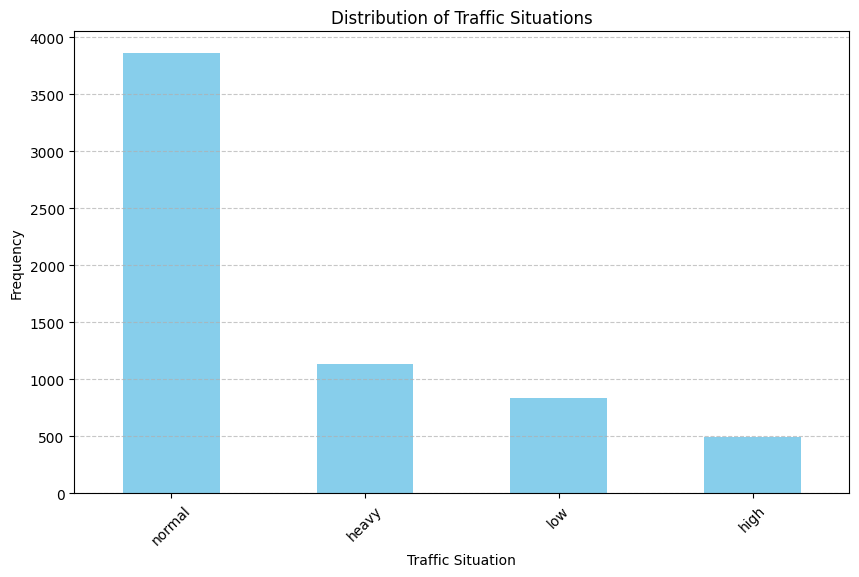

In [7]:
import matplotlib.pyplot as plt
# Frequency distribution
freq_dist = df['Traffic Situation'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
freq_dist.plot(kind='bar', color='skyblue')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Correlation Analysis**

In [8]:
df_copy = df.copy()


df_copy = df_copy.drop(columns=['Time'])

df_copy['Day of the week'] = df_copy['Day of the week'].astype('category').cat.codes
df_copy['Traffic Situation'] = df_copy['Traffic Situation'].astype('category').cat.codes

corr_matrix = df_copy.corr()


print(corr_matrix)


                       Date  Day of the week  CarCount  BikeCount  BusCount  \
Date               1.000000        -0.118882 -0.010507  -0.001985 -0.006166   
Day of the week   -0.118882         1.000000  0.013478  -0.087412  0.115630   
CarCount          -0.010507         0.013478  1.000000   0.705941  0.664491   
BikeCount         -0.001985        -0.087412  0.705941   1.000000  0.581289   
BusCount          -0.006166         0.115630  0.664491   0.581289  1.000000   
TruckCount         0.021137         0.022574 -0.583984  -0.585670 -0.533847   
Total             -0.006041         0.022747  0.971386   0.779261  0.763496   
Traffic Situation  0.009278         0.024173 -0.686521  -0.575332 -0.614372   

                   TruckCount     Total  Traffic Situation  
Date                 0.021137 -0.006041           0.009278  
Day of the week      0.022574  0.022747           0.024173  
CarCount            -0.583984  0.971386          -0.686521  
BikeCount           -0.585670  0.779261     

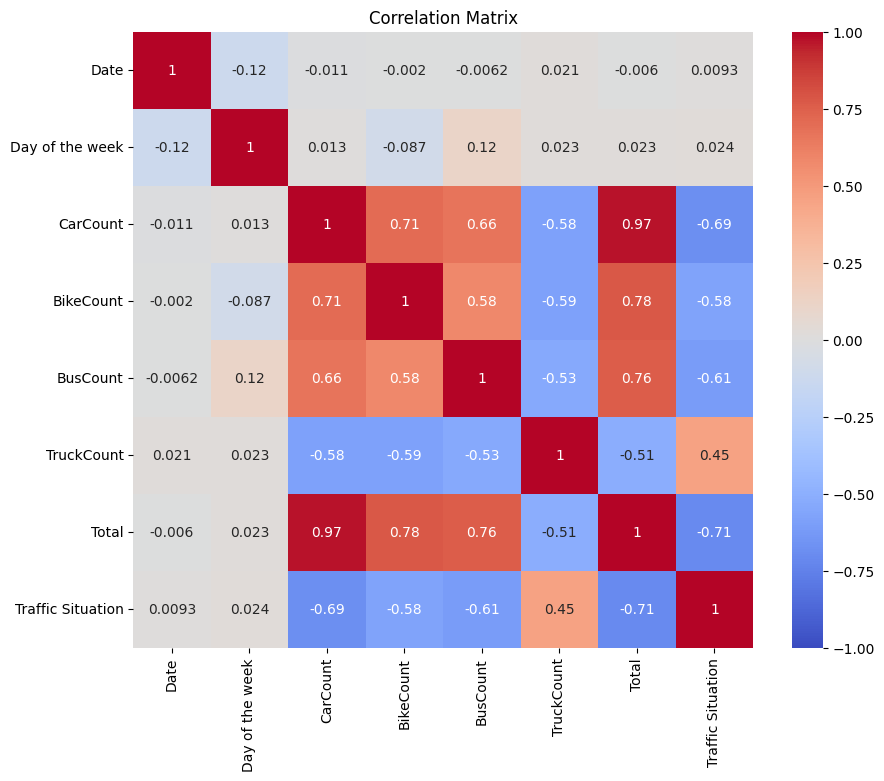

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

# **Check for Missing Values**

In [10]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [11]:
df.duplicated().sum()

0

# **Encode Categorical Variables**

In [12]:

# df = pd.DataFrame({
#     'Day of the week': ['Thursday', 'Friday', 'Saturday'],
#     'Traffic Situation': ['Heavy', 'Moderate', 'Light']
# })

df = df.drop(columns=['Time'])
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Day of the week'])

print(df_encoded)

      Date  CarCount  BikeCount  BusCount  TruckCount  Total  \
0       10        13          2         2          24     41   
1       10        14          1         1          36     52   
2       10        10          2         2          32     46   
3       10        10          2         2          36     50   
4       10        11          2         1          34     48   
...    ...       ...        ...       ...         ...    ...   
6319     9        26         16        13          16     71   
6320     9        72         25        10          27    134   
6321     9       107         13        14          28    162   
6322     9       106         18        13          27    164   
6323     9        14          3         1          15     33   

     Traffic Situation  Day of the week_Friday  Day of the week_Monday  \
0               normal                   False                   False   
1               normal                   False                   False   
2        

In [13]:
df_encoded

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,10,13,2,2,24,41,normal,False,False,False,False,False,True,False
1,10,14,1,1,36,52,normal,False,False,False,False,False,True,False
2,10,10,2,2,32,46,normal,False,False,False,False,False,True,False
3,10,10,2,2,36,50,normal,False,False,False,False,False,True,False
4,10,11,2,1,34,48,normal,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,9,26,16,13,16,71,normal,False,False,False,False,True,False,False
6320,9,72,25,10,27,134,high,False,False,False,False,True,False,False
6321,9,107,13,14,28,162,high,False,False,False,False,True,False,False
6322,9,106,18,13,27,164,high,False,False,False,False,True,False,False


In [14]:

# Define the mapping
traffic_mapping = {
    'low': 0,
    'normal': 1,
    'high': 2,
    'heavy': 3
}

# Apply the mapping
df_encoded['Traffic Situation'] = df_encoded['Traffic Situation'].map(traffic_mapping)

print(df_encoded)


      Date  CarCount  BikeCount  BusCount  TruckCount  Total  \
0       10        13          2         2          24     41   
1       10        14          1         1          36     52   
2       10        10          2         2          32     46   
3       10        10          2         2          36     50   
4       10        11          2         1          34     48   
...    ...       ...        ...       ...         ...    ...   
6319     9        26         16        13          16     71   
6320     9        72         25        10          27    134   
6321     9       107         13        14          28    162   
6322     9       106         18        13          27    164   
6323     9        14          3         1          15     33   

      Traffic Situation  Day of the week_Friday  Day of the week_Monday  \
0                     1                   False                   False   
1                     1                   False                   False   
2     

In [15]:
df_encoded.head()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,10,13,2,2,24,41,1,False,False,False,False,False,True,False
1,10,14,1,1,36,52,1,False,False,False,False,False,True,False
2,10,10,2,2,32,46,1,False,False,False,False,False,True,False
3,10,10,2,2,36,50,1,False,False,False,False,False,True,False
4,10,11,2,1,34,48,1,False,False,False,False,False,True,False


# **Feature Scaling**

In [16]:
scaler = StandardScaler()

# Apply Standardization to specified columns
df_encoded[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']] = scaler.fit_transform(
    df_encoded[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
)

print("Standardized DataFrame:")
print(df_encoded)

Standardized DataFrame:
      Date  CarCount  BikeCount  BusCount  TruckCount     Total  \
0       10 -1.159175  -0.881214 -0.857050    0.498124 -1.192287   
1       10 -1.136604  -0.969218 -0.938226    1.617112 -0.995318   
2       10 -1.226890  -0.881214 -0.857050    1.244116 -1.102756   
3       10 -1.226890  -0.881214 -0.857050    1.617112 -1.031131   
4       10 -1.204319  -0.881214 -0.938226    1.430614 -1.066943   
...    ...       ...        ...       ...         ...       ...   
6319     9 -0.865746   0.350849  0.035890   -0.247868 -0.655099   
6320     9  0.172545   1.142889 -0.207639    0.777871  0.472996   
6321     9  0.962549   0.086836  0.117066    0.871120  0.974371   
6322     9  0.939977   0.526858  0.035890    0.777871  1.010184   
6323     9 -1.136604  -0.793209 -0.938226   -0.341117 -1.335537   

      Traffic Situation  Day of the week_Friday  Day of the week_Monday  \
0                     1                   False                   False   
1                    

In [18]:
df_encoded

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,10,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,1,False,False,False,False,False,True,False
1,10,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,1,False,False,False,False,False,True,False
2,10,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,1,False,False,False,False,False,True,False
3,10,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,1,False,False,False,False,False,True,False
4,10,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,1,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,9,-0.865746,0.350849,0.035890,-0.247868,-0.655099,1,False,False,False,False,True,False,False
6320,9,0.172545,1.142889,-0.207639,0.777871,0.472996,2,False,False,False,False,True,False,False
6321,9,0.962549,0.086836,0.117066,0.871120,0.974371,2,False,False,False,False,True,False,False
6322,9,0.939977,0.526858,0.035890,0.777871,1.010184,2,False,False,False,False,True,False,False


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

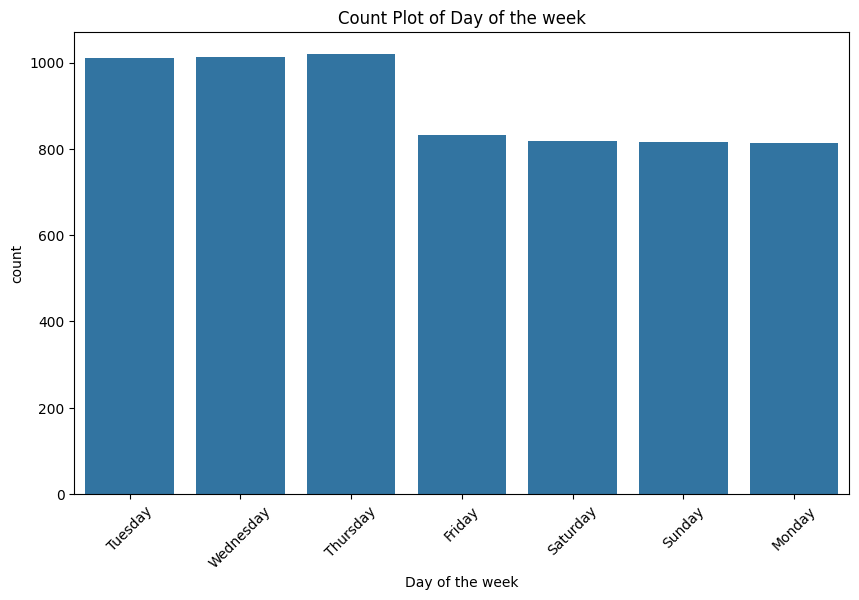

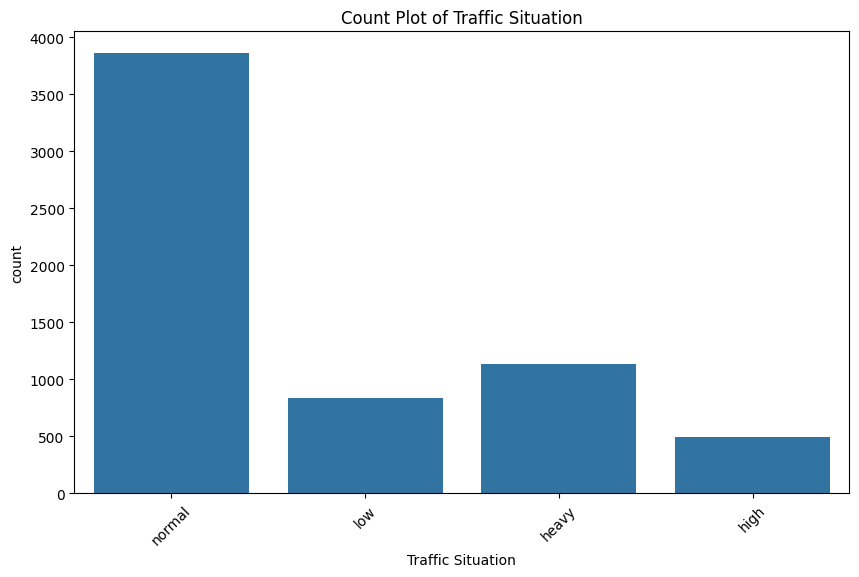

In [20]:
# Create a list of categorical columns to visualize
categorical_columns = ['Day of the week', 'Traffic Situation']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
    plt.show()


                       Date  Day of the week  CarCount  BikeCount  BusCount  \
Date               1.000000        -0.118882 -0.010507  -0.001985 -0.006166   
Day of the week   -0.118882         1.000000  0.013478  -0.087412  0.115630   
CarCount          -0.010507         0.013478  1.000000   0.705941  0.664491   
BikeCount         -0.001985        -0.087412  0.705941   1.000000  0.581289   
BusCount          -0.006166         0.115630  0.664491   0.581289  1.000000   
TruckCount         0.021137         0.022574 -0.583984  -0.585670 -0.533847   
Total             -0.006041         0.022747  0.971386   0.779261  0.763496   
Traffic Situation  0.009278         0.024173 -0.686521  -0.575332 -0.614372   

                   TruckCount     Total  Traffic Situation  
Date                 0.021137 -0.006041           0.009278  
Day of the week      0.022574  0.022747           0.024173  
CarCount            -0.583984  0.971386          -0.686521  
BikeCount           -0.585670  0.779261     

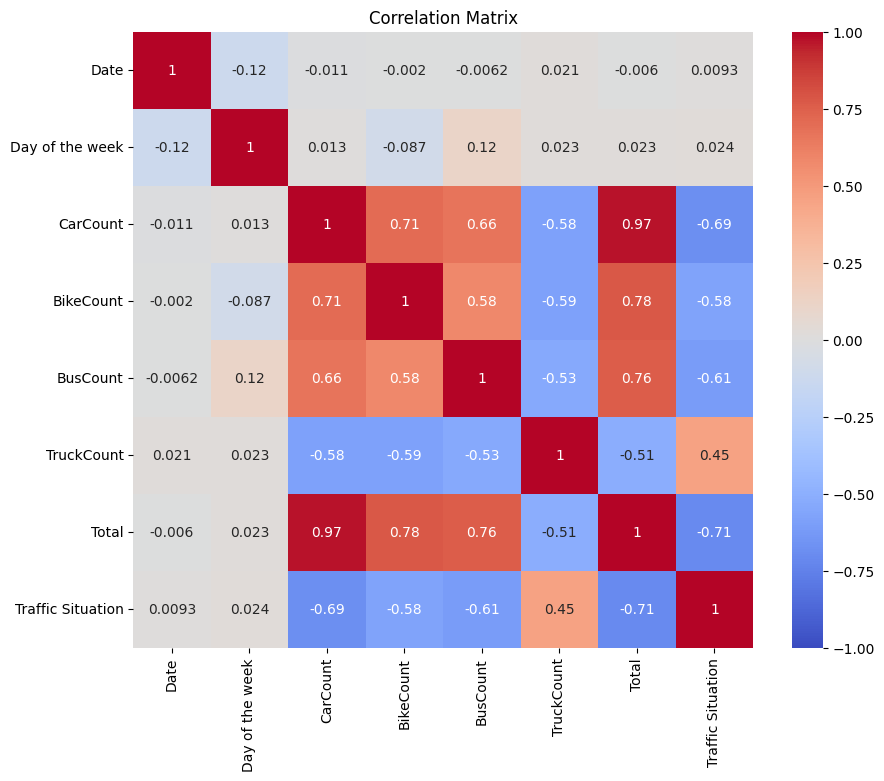

In [19]:
df_copy['Day of the week'] = df_copy['Day of the week'].astype('category').cat.codes
df_copy['Traffic Situation'] = df_copy['Traffic Situation'].astype('category').cat.codes

corr_matrix = df_copy.corr()


print(corr_matrix)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [21]:
X = df_encoded.drop('Traffic Situation', axis=1)
y = df_encoded['Traffic Situation']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [23]:
base_estimator = KNeighborsClassifier()
bagging_classifier = BaggingClassifier(base_estimator, n_estimators=50, random_state=42)

bagging_classifier.fit(X_train, y_train)

predictions = bagging_classifier.predict(X_test)


### Evaluate the model performance

In [24]:
accuracy = accuracy_score(y_test, predictions)
print(f'Bagging Classifier Model Accuracy: {accuracy * 100:.2f}%')

Bagging Classifier Model Accuracy: 82.92%


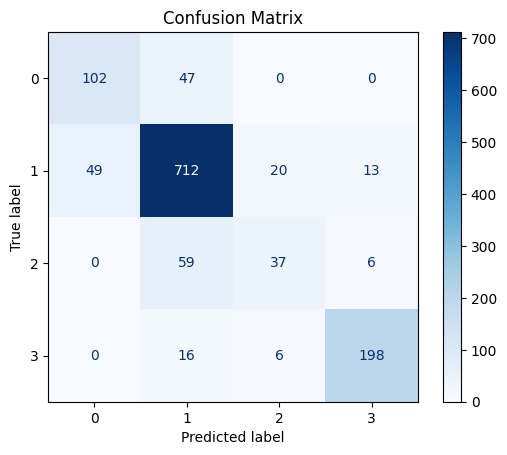

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb_classifier = XGBClassifier(n_estimators=50, random_state=42)
xgb_classifier.fit(X_train, y_train)

predictions = xgb_classifier.predict(X_test)

### Evaluate the model performance

In [28]:
accuracy = accuracy_score(y_test, predictions)
print(f'XGBoost Classifier Model Accuracy: {accuracy * 100:.2f}%')

XGBoost Classifier Model Accuracy: 90.28%


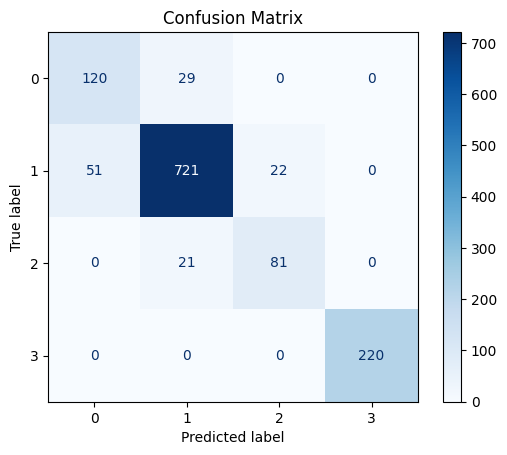

In [29]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [30]:
base_models = [
    ('BaggingClassifier', BaggingClassifier(base_estimator, n_estimators=50, random_state=42)),
    ('XGBClassifier', XGBClassifier(n_estimators=50, random_state=42)),
]

### Define meta-learner (LogisticRegression)

In [31]:
meta_model = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [32]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('BaggingClassifier',
                                BaggingClassifier(estimator=KNeighborsClassifier(),
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              ev...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [33]:
predictions = stacking_classifier.predict(X_test)

### Evaluate the model performance

In [34]:
accuracy = accuracy_score(y_test, predictions)
print(f'Stacking Classifier Model Accuracy: {accuracy * 100:.2f}%')

Stacking Classifier Model Accuracy: 90.12%


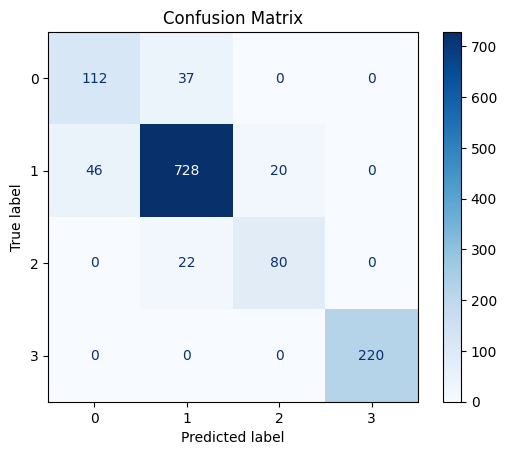

In [35]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

**Feature Selection and Engineering**


1.   No feature selection or engineering was done due to a small number of features.




**Model Selection**
1.   Accuracy is a straightforward measure of overall correctness, but confusion metrics provide deeper insights into model performance, particularly regarding misclassifications
2.  models:
XGBoost: Best accuracy (90.28%). Effective with complex data.
Stacking: Nearly as accurate (90.12%) and better at handling misclassifications.
Bagging: Lower accuracy (82.92%).

**Model Evaluation**

Used accuracy and confusion metrics. Stacking showed the best performance in reducing misclassifications.
